In [1]:
#module6

Module 6: Dimensionality Reduction


Name: Srinivasa Reddy Julakanti Registration Number: 21BDS0220

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
# Load the dataset
data = pd.read_csv('bank_marketing_test.csv')
summary = data.describe()
print(summary)

               age     duration    campaign        pdays     previous  \
count  8237.000000  8237.000000  8237.00000  8237.000000  8237.000000   
mean     40.116547   256.007648     2.60471   962.228724     0.174335   
std      10.465328   259.728737     2.91562   187.533881     0.500565   
min      17.000000     4.000000     1.00000     0.000000     0.000000   
25%      32.000000   101.000000     1.00000   999.000000     0.000000   
50%      38.000000   179.000000     2.00000   999.000000     0.000000   
75%      47.000000   316.000000     3.00000   999.000000     0.000000   
max      89.000000  4918.000000    43.00000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   8237.000000     8237.000000    8237.000000  8237.000000  8237.000000  
mean       0.070147       93.577806     -40.545320     3.608206  5166.589790  
std        1.574685        0.582138       4.623626     1.735931    72.470977  
min       -3.400000       

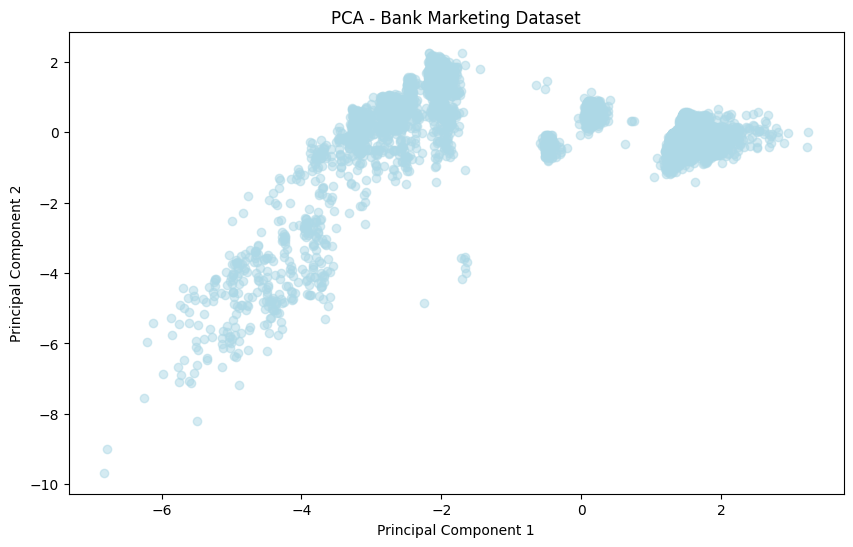

In [3]:
# Selecting numeric columns and scaling the features
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='lightblue', alpha=0.5)
plt.title("PCA - Bank Marketing Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

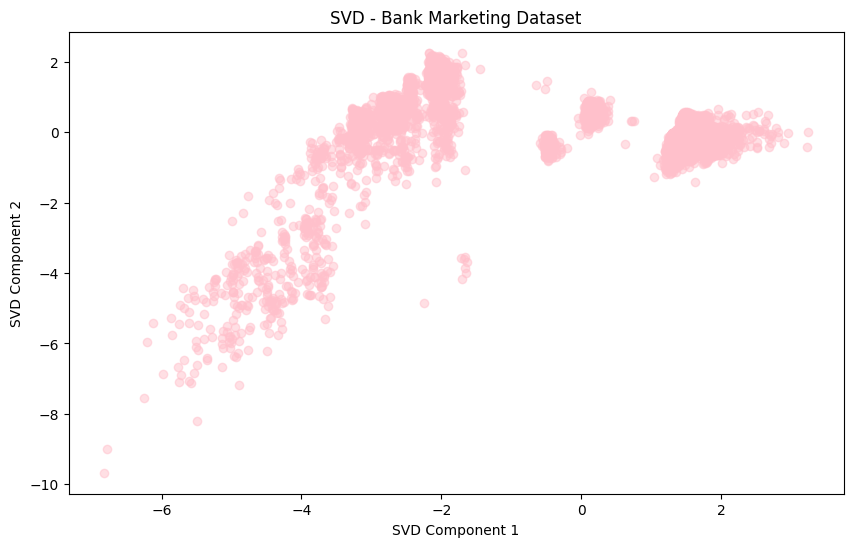

In [4]:
# SVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], c='pink', alpha=0.5)
plt.title("SVD - Bank Marketing Dataset")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

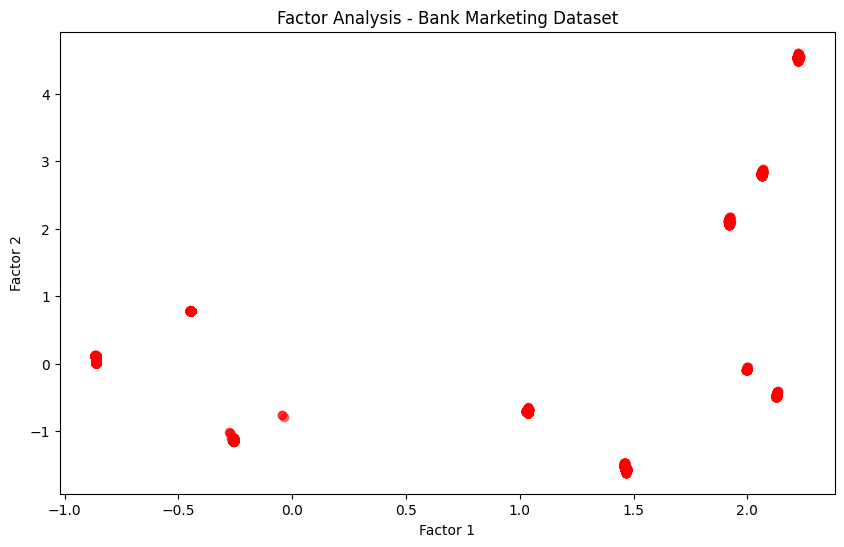

In [5]:
# Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_data = fa.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(fa_data[:, 0], fa_data[:, 1], c='red', alpha=0.5)
plt.title("Factor Analysis - Bank Marketing Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

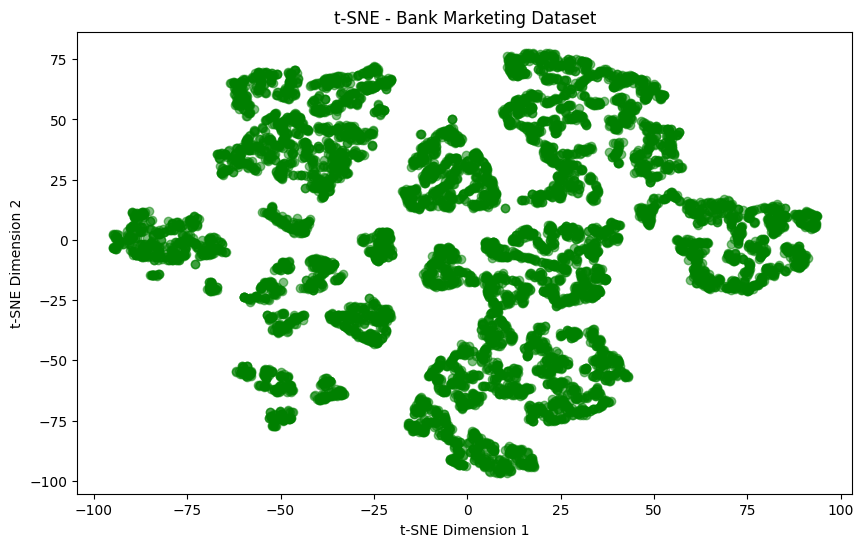

In [6]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='green', alpha=0.5)
plt.title("t-SNE - Bank Marketing Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [8]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=75de1f0abfd849d91517d27ba4ab09ced79845fae42e2c097a62eb34fd53121f
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


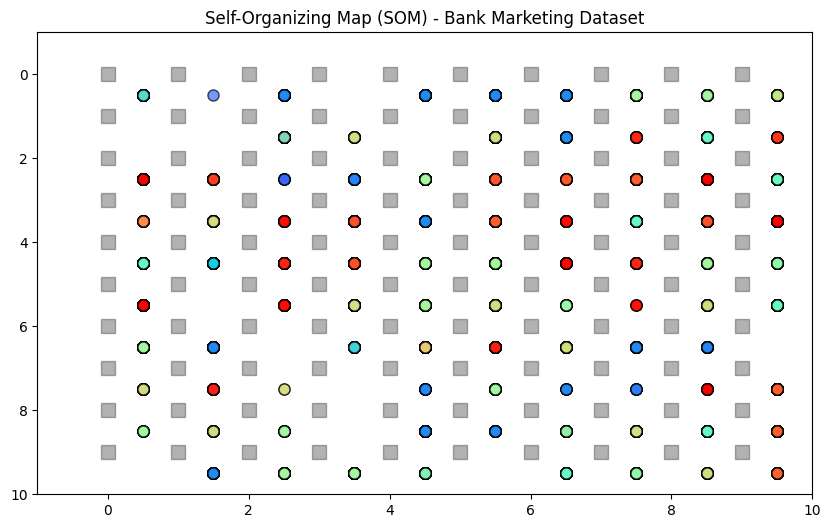

In [9]:
# Self-Organizing Maps (SOM)
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 100)

plt.figure(figsize=(10, 6))
for i in range(10):
    for j in range(10):
        plt.scatter(i, j, s=100, c='black', alpha=0.3, marker='s')

for i, x in enumerate(scaled_data):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.rainbow(i / len(scaled_data)),
             markeredgecolor='k', markersize=8, alpha=0.7)

plt.title("Self-Organizing Map (SOM) - Bank Marketing Dataset")
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.gca().invert_yaxis()
plt.show()